In [6]:
import json
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from evaluate.lane import LaneEval
import random
import os
%matplotlib inline


In [7]:
def show_samples(n_samples, images, randomize=False):
    """Shows multiple images from path list"""
    for sample_n in range(n_samples):
        if randomize:
            n = random.randint(0, len(images)-1)
        else:
            n = sample_n
        label = raw_files[n][-32:-6]
        fig = plt.figure(figsize=(30,6))
        ax = plt.subplot(np.ceil(n_samples/3), 3, sample_n+1)
        ax.set_title(label)
        img = plt.imread(images[n])
        ax.imshow(img)
        ax.set_yticklabels([])
        ax.set_xticklabels([])
    plt.tight_layout()
    plt.show()


### Get Data And Create small subset for testing

In [8]:
small_set = True
### READ FILE
data_path = "test_set"
json_gt = [json.loads(line) for line in open('test_baseline.json')]
if small_set:
    subset = np.random.choice(json_gt, size=15, replace = False)
    json_gt=subset

gt_lanes=[]
y_samples=[]
raw_files=[]
short_names=[]
for i in range(len(json_gt)):
    gt = json_gt[i]
    gt_lanes.append(gt['lanes'])
    y_samples.append(gt['h_samples'])
    raw_files.append(os.path.join(data_path,gt['raw_file']))
    short_names.append(raw_files[i][-29:-7])
    

### Examine Data

Total data:  15
Path example:  test_set\clips/0601/1494452491545449915/20.jpg


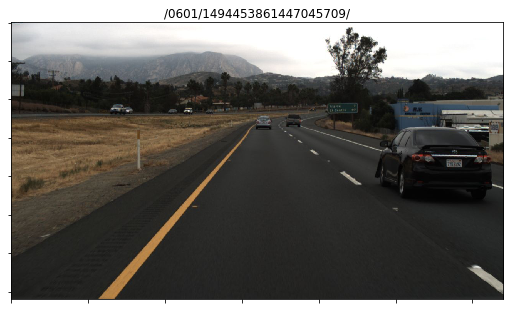

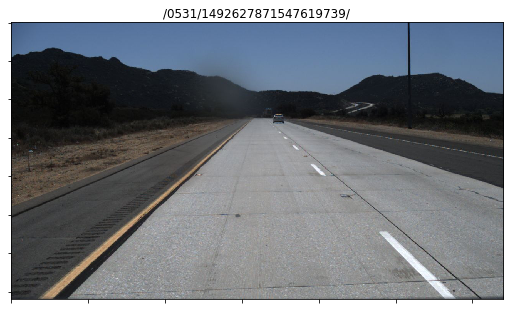

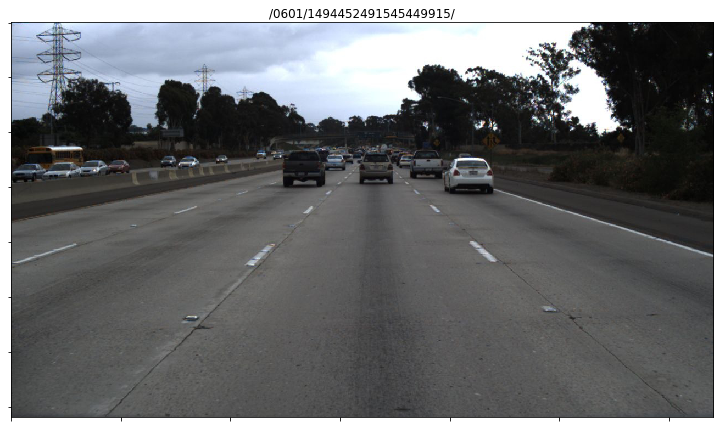

Single Image
Image Size:  2764928 bytes


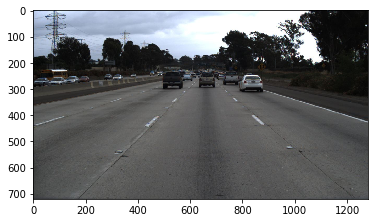

In [9]:
from sys import getsizeof
print("Total data: ",len(json_gt))
print("Path example: ", raw_files[0])
show_samples(3,raw_files, randomize=True)
print("Single Image")
img = mpimg.imread(raw_files[0])
print("Image Size: ", getsizeof(img), "bytes")
plt.imshow(img)


### Preprocessing

In [10]:
### Crop, as max index for evaluation is 160, no case
##  in looking above
def roi(img,y):
    """Region of Interest"""
    return(img[y:len(img)])

def color_mask(img, lower=[0,210,148], upper=[255,255,255]):
    """Returns mask from color image"""
    return cv2.inRange(img, lower, upper)

def gray_mask(img, lower=230, upper=255):
    """Returns mask from gray image"""    
    return cv2.inRange(img, lower, upper)

def hls_tresh(S_channel, low_limit=0, high_limit=255):
    """Takes saturation channel, outputs binary image"""
    s_binary=np.zeros_like(S_channel)
    s_binary[(S_channel>=low_limit) & (S_channel<=high_limit)]=1
    return s_binary

In [11]:
#Open in batch and save subset
for i in range(len(raw_files)):
    img = mpimg.imread(raw_files[i])
    mpimg.imsave("out_img/"+str(i)+".jpg",img)
    

Image Size:  2764928 bytes
720
Image Size:  128 bytes


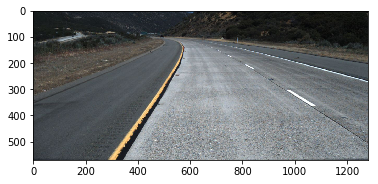

In [12]:
img = mpimg.imread(raw_files[5])
print("Image Size: ", getsizeof(img), "bytes")
print(len(img))
img = roi(img,150)
print("Image Size: ", getsizeof(img), "bytes")
plt.imshow(img)
        


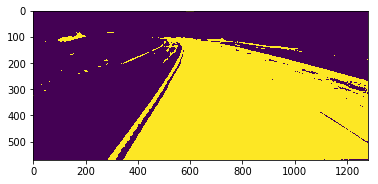

In [13]:
img = cv2.blur(img,(5,5))
s_channel = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)[:,:,0]
s_channel = hls_tresh(s_channel, 100,255)
plt.imshow(s_channel)


In [14]:
for i in range(len(raw_files)):
    img = cv2.imread(raw_files[i])
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    img = roi(gray,150)
    mpimg.imsave("out_img/"+str(i)+"_crop.jpg",cv2.cvtColor(img, cv2.COLOR_GRAY2RGB))
    img = gray_mask(img, 170,255)
    mpimg.imsave("out_img/"+str(i)+"_mask.jpg",cv2.cvtColor(img, cv2.COLOR_GRAY2RGB))

In [15]:
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

error: C:\bld\opencv_1498171314629\work\opencv-3.2.0\modules\imgproc\src\color.cpp:9748: error: (-215) scn == 3 || scn == 4 in function cv::cvtColor
